In [1]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# preprocessing

In [16]:
# imporitng test dataset

df = pd.read_csv("train.csv")
df.head()

# select numerical values only
df2 = df.select_dtypes(include='number')
df2.head()

df_test = pd.read_csv("test.csv")

list_names_train = []
list_names_test = []
all_names_train = df.columns.to_list()
all_names_test = df.columns.to_list()

print("Columns including null values:")
for i in df.columns:
    if df[i].isnull().values.any() == True:
        print(i)
        list_names_train.append(i)
    else:
        continue

print("Columns in test dataset including null values:")
for i in df_test.columns:
    if df_test[i].isnull().values.any() == True:
        print(i)
        list_names_test.append(i)
    else:
        continue


Columns including null values:
BWH
BWD
BWA
IWH
IWD
IWA
LBH
LBD
LBA
PSH
PSD
PSA
SJH
SJD
SJA
GBH
GBD
GBA
BSH
BSD
BSA
Columns in tsest dataset including null values:
SJH
SJD
SJA
GBH
GBD
GBA
BSH
BSD
BSA


36


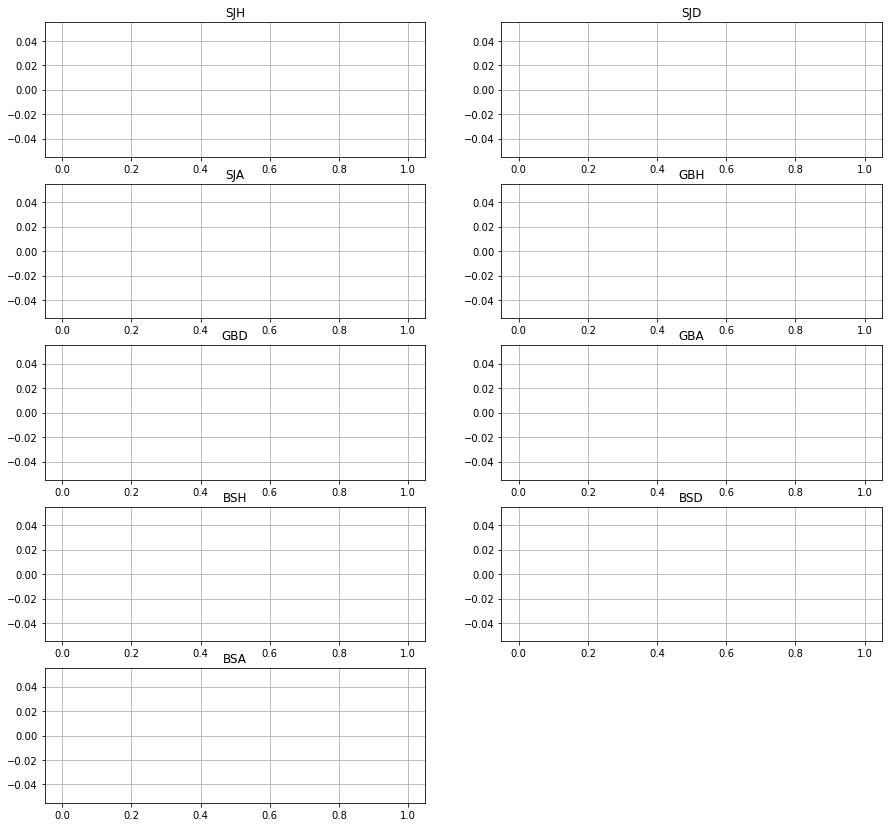

In [3]:
# to check the data for test dataset
print(len(df_test.columns))
for i, column in enumerate(df_test[list_names_test].columns):
    ax = plt.subplot(17, 2, i + 1)
    df_test[column].hist(bins = 30, ax = ax, figsize = (15, 50))
    ax.set_title(column) 
plt.show()


39


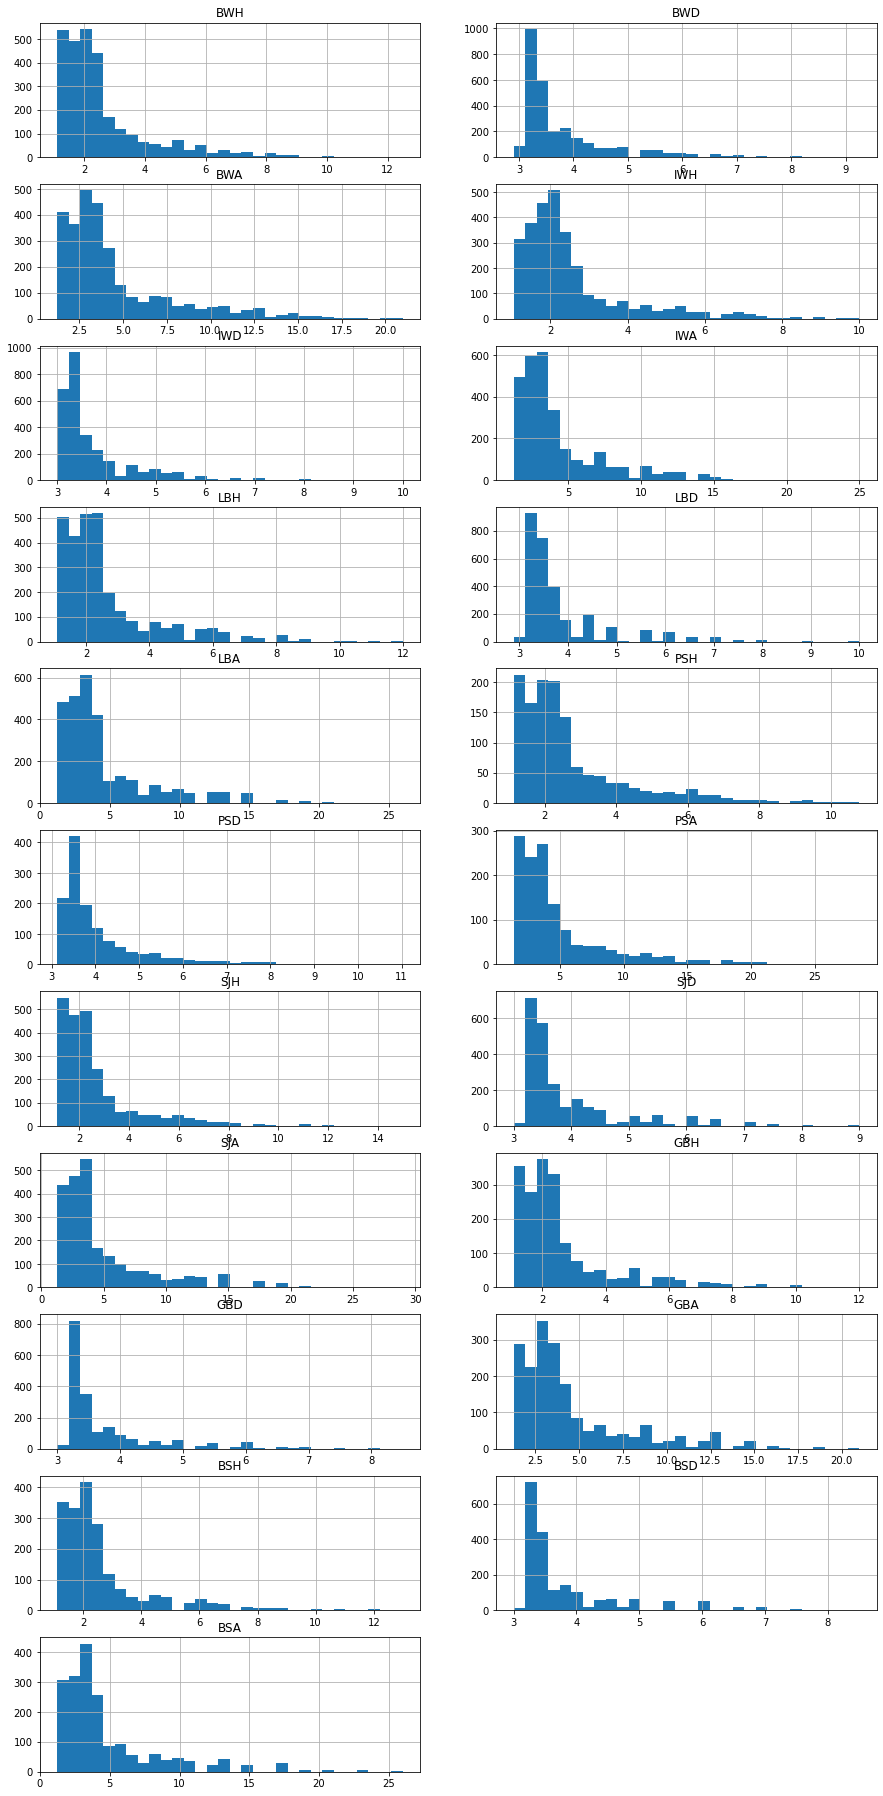

In [4]:
# to check for the data that has missing values in the train dataset
print(len(df.columns))

for i, column in enumerate(df[list_names_train].columns):
    ax = plt.subplot(17, 2, i + 1)
    df[column].hist(bins = 30, ax = ax, figsize = (15, 50))
    ax.set_title(column) 
plt.show()


# no data found in the colums from test dataset, so I remove them form train dataset as well from the further models
# the rest of the columns  - the NAN values are replaced with the median due to high sqweenes of the distrubutions


In [44]:
print(list_names_test)
df_final = df.copy()
df_final.drop(labels=list_names_test, axis= 1, inplace=True)
print(df_final.columns)

['SJH', 'SJD', 'SJA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']


KeyError: "['SJH' 'SJD' 'SJA' 'GBH' 'GBD' 'GBA' 'BSH' 'BSD' 'BSA'] not found in axis"

In [36]:
#print(list_names_train)
#print(list_names_test)
list_names_train2 = list_names_train.copy()
all_names_train2 = all_names_train.copy()

for i in list_names_train:
    if i not in list_names_test:
        all_names_train2.remove(i)
        list_names_train2.remove(i)
        
print(all_names_train2)
print(list_names_train2)
#print(list_names_train2)
print(len(list_names_train2))


# I choose the median because based on the higly skeweed distribution mean value or 0 are not the most appropriate approximation
df_final1 = df[list_names_train2].copy()
print(df_final1[list_names_train2].columns)

#for i in df_final1[list_names_train2].columns:
df_final1= df_final1.fillna(df_final1.median())
df_final1.head()
print(df_final1.head())


# drop columns from the initial columns from the main dataset
df_final2 = df.copy()
df_final2.drop(labels=all_names_train2, axis=1,inplace=True)
print(df_final2.columns)


# concatenating two final datasets
#df_final =pd.concat([df_final2, df_final1], axis=1)
print(df_final2.columns)
df_final2.head()

['id', 'season', 'stage', 'date', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'outcome']
['SJH', 'SJD', 'SJA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
9
Index(['SJH', 'SJD', 'SJA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'], dtype='object')
    SJH   SJD    SJA   GBH   GBD   GBA   BSH   BSD    BSA
0  1.25  5.00  10.00  1.30  4.75  10.0  1.29  4.50  11.00
1  1.20  5.50  12.00  1.22  5.50  13.0  1.22  5.00  13.00
2  4.33  3.40   1.73  5.00  3.40   1.7  4.50  3.40   1.73
3  1.91  3.25   3.75  1.91  3.25   4.0  1.91  3.25   3.80
4  1.91  3.25   3.75  1.91  3.25   4.0  1.91  3.30   3.75
Index(['BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH',
       'PSD', 'PSA'],
      dtype='object')
Index(['BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH',
       'PSD', 'PSA'],
      dtype='object')


,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA
0,1.30,4.75,8.25,1.3,4.4,8.50,1.25,4.5,10.00,NaN,NaN,NaN
1,1.22,5.50,10.00,1.2,5.2,11.00,1.20,5.0,11.00,NaN,NaN,NaN
2,5.00,3.35,1.67,4.5,3.5,1.65,4.50,3.3,1.67,NaN,NaN,NaN
3,1.90,3.20,3.80,1.8,3.3,3.80,1.80,3.2,4.00,NaN,NaN,NaN
4,1.95,3.20,3.60,2.0,3.2,3.30,1.83,3.2,3.75,NaN,NaN,NaN


In [37]:
print("Columns in new final dataset including null values:")
list_names_final = []
for i in df_final2.columns:
    if df_final2[i].isnull().values.any() == True:
        print(i)
        list_names_final.append(i)
    else:
        continue

Columns in new final dataset including null values:
BWH
BWD
BWA
IWH
IWD
IWA
LBH
LBD
LBA
PSH
PSD
PSA


In [38]:
# creating a new variable outcome

#df_final["outcome"] = ""
#df_final.loc[df_final["home_team_goal"] > df_final["away_team_goal"], "outcome"] = 1
#df_final.loc[df_final["home_team_goal"] == df_final["away_team_goal"], "outcome"] = 0
#df_final.loc[df_final["home_team_goal"] < df_final["away_team_goal"], "outcome"] = -1

#print(df_final[["outcome"]].head())
#df_final.columns


ValueError: Can only compare identically-labeled DataFrame objects

In [52]:
df_test["outcome"] = ""

# save final dataset
df_final.to_csv("train_p.csv")
df_test.to_csv("test_p.csv")

# Model creation - logistic regression

In [53]:

# example of training a final classification model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

train = pd.read_csv("train_p.csv")
print(train.head())

# fit final model
model = LogisticRegression()

train_ind = train.copy()
train_ind.drop(labels=["outcome","outcome.1", "id", "season", "home_team_goal", "away_team_goal", "date", "Unnamed: 0", "home_team_api_id", "away_team_api_id"], axis=1,inplace=True)


#train_columns = train.columns.to_list().remove("outcome")
print(train_ind.head())
print(train_ind.columns)
model.fit(train_ind, train[["outcome"]])

   Unnamed: 0    id     season  stage                 date  home_team_api_id  \
0           0  1729  2008/2009      1  2008-08-17 00:00:00                 1   
1           1  1730  2008/2009      1  2008-08-16 00:00:00                 2   
2           2  1731  2008/2009      1  2008-08-16 00:00:00                 3   
3           3  1732  2008/2009      1  2008-08-16 00:00:00                 4   
4           4  1733  2008/2009      1  2008-08-17 00:00:00                 5   

   away_team_api_id  home_team_goal  away_team_goal  B365H  ...  VCH.1  VCD.1  \
0                13               1               1   1.29  ...   1.28    5.5   
1                16               1               0   1.20  ...   1.25    6.0   
2                12               0               1   5.50  ...   5.50    3.8   
3                20               2               1   1.91  ...   1.90    3.5   
4                18               4               2   1.91  ...   1.90    3.5   

   VCA.1   GBH  GBD.1   GBA  BSH

ValueError: could not convert string to float: '2008/2009'